In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
df = pd.read_csv('cheap_train_sample.csv')

# Understand Features 


For each fewtures, we will discuss how to incorporate the features into the models by encoding. 

In [4]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K


### Feature:'age' 

Meaning: Age of person
Minimum: 17
Maximum: 90

Suggested use:  Leave as is

In [11]:
df['age'].value_counts(normalize=True).sort_values()

80    0.000154
88    0.000154
77    0.000307
82    0.000614
79    0.000614
        ...   
40    0.027176
36    0.027483
35    0.028098
31    0.028558
33    0.028558
Name: age, Length: 69, dtype: float64

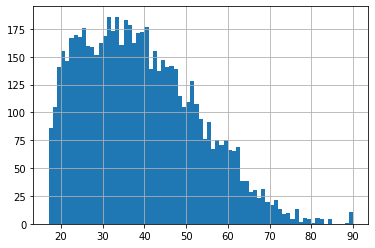

In [17]:
df['age'].hist(bins=73);

### Feature:'workclass', 

Suggested use: Dummy. 
X_test['workclass']='ninja'

In [16]:
df['workclass'].unique()

array([' Private', ' Federal-gov', ' Self-emp-not-inc', ' State-gov',
       ' Self-emp-inc', ' ?', ' Local-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

### Feature:'fnlwgt', 

Interpretation: 

Count of people fitting the description/similar demographics over 4 decades' censuses. 

The lowest value is $12,285$, largest $1,366,120$.

Suggested use: ???

In [84]:
df['fnlwgt'].sort_values()

4144      12285
4084      13769
285       14878
2539      19302
1045      19302
         ...   
450      849857
3488     910398
605      917220
3501     981628
1990    1366120
Name: fnlwgt, Length: 6513, dtype: int64

In [28]:
df['fnlwgt'].value_counts()

138852    6
185385    5
112497    5
132879    4
96062     4
         ..
272896    1
216256    1
243368    1
53878     1
223277    1
Name: fnlwgt, Length: 5856, dtype: int64

In [29]:
df[df['fnlwgt']== 96062 ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
1657,53,Private,96062,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,1740,40,United-States,<=50K
2304,54,Private,96062,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,Male,0,0,40,United-States,>50K
2367,50,Local-gov,96062,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,<=50K
3171,51,Private,96062,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,1977,40,United-States,>50K


<AxesSubplot:>

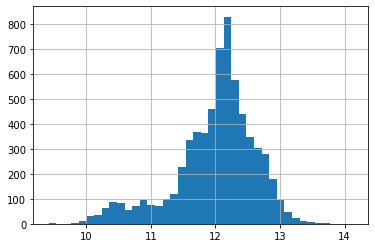

In [22]:
df['fnlwgt'].apply(np.log).hist(bins=40)

### Feature:'education', 

This data is better characterized by 'education_num', so we drop it. 

In [31]:
del df['education'] 

### Feature:'education-num',

Ordinal encoding of years of education,  1 to 16, (preschool to doctorate)

Suggested use: keep as is. 

### Feature:'marital-status', 

Suggested use: Dummy  

In [36]:
df['marital-status'].unique()

array([' Divorced', ' Married-civ-spouse', ' Never-married', ' Widowed',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

### Feature:'occupation', 

Suggested use: dummy

In [41]:
df['occupation'].unique()

array([' Adm-clerical', ' Craft-repair', ' Sales', ' Other-service',
       ' Exec-managerial', ' Tech-support', ' Prof-specialty',
       ' Transport-moving', ' Handlers-cleaners', ' Farming-fishing',
       ' ?', ' Machine-op-inspct', ' Protective-serv', ' Priv-house-serv',
       ' Armed-Forces'], dtype=object)

### Feature:'relationship', 


We do not understand. Drop it. 

In [43]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Unmarried', ' Own-child',
       ' Other-relative'], dtype=object)

### Feature:`'sex'`

Suggested use : Binarize

In [45]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

### Feature:'capital-gain',

Meaning? 

Suggested use: 
Drop now, 
But to get better model later, try keeping it just like this. 

Possibly binarize

In [48]:
df['capital-gain'].value_counts(normalize=True)

0        0.920160
7688     0.009059
15024    0.008905
7298     0.006756
99999    0.004913
           ...   
4416     0.000154
1424     0.000154
2062     0.000154
41310    0.000154
1086     0.000154
Name: capital-gain, Length: 88, dtype: float64

In [49]:
df['capital-gain'].unique()

array([    0,  7688, 14084,  6497,  5178, 20051, 27828,  4101, 99999,
        2036,  3411,  4508,  7298, 15024,  2176,  3908,  4064,  5013,
        3103,  6418,  2936,  4386,  1409,  9386,  8614,  2174, 10520,
       41310,  4650,  2580,  2414,  2062,  1424,  2885,  5455,  4416,
        2407, 10566,  3942,  2961,  9562,  2290,  5556, 25236,   594,
        2329,  3887,  6849,  2829,  3818,  2993,  4787,  6360,  2346,
        3325,   401, 14344,  2597,  3137,  1471, 10605,  1055,  2202,
        2009, 13550,   991,  2635,  4865,   114,  4687,  3464, 15020,
        1506,  5721,  2463,  2354,  2387, 22040,  2907,  6514,  1848,
        3781,  2050, 25124,  2653, 15831,  3418,  1086])

### Feature:'capital-loss', 

Suggested use: keep as is

In [50]:
df['capital-loss'].value_counts(normalize=True)

0       0.950560
1902    0.007063
1887    0.005527
1977    0.003685
1740    0.002457
          ...   
1719    0.000154
1617    0.000154
1825    0.000154
1755    0.000154
1668    0.000154
Name: capital-loss, Length: 70, dtype: float64

### Feature:'hours-per-week', 

Meaning: Number of hours the census respondent works per week. 

Suggested use: 
Set hours per week of `work-class` in  [ 'never worked' ,'without pay'] to 0.

In [54]:
df[df['workclass']==' Without-pay'] 

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
2019,68,Without-pay,174695,10,Married-spouse-absent,Farming-fishing,Unmarried,Female,0,0,25,United-States,<=50K
4167,19,Without-pay,43887,9,Never-married,Farming-fishing,Own-child,Male,0,0,10,United-States,<=50K


In [53]:
df[df['workclass']==' Never-worked']

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
4124,30,Never-worked,176673,9,Married-civ-spouse,?,Wife,Female,0,0,40,United-States,<=50K
5944,18,Never-worked,206359,6,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K


In [63]:
df.loc[ [2019, 4124,4167, 5944], ['hours-per-week']] = 0

In [64]:
df[  (df['workclass']==' Without-pay') | (df['workclass']==' Never-worked') ]['hours-per-week']

2019    0
4124    0
4167    0
5944    0
Name: hours-per-week, dtype: int64

### Feature:'native-country', 

Suggested use: ignore for now. 

dummy (allows distinction between countries: dominated by high income immigrants)
binarize (lumps all non-=us countries together)
drop


In [66]:
df['native-country'].unique()

array([' United-States', ' Germany', ' Iran', ' Philippines', ' Mexico',
       ' India', ' ?', ' Canada', ' South', ' El-Salvador', ' England',
       ' Peru', ' Japan', ' France', ' Columbia', ' Cuba', ' Scotland',
       ' Vietnam', ' Hong', ' Jamaica', ' Nicaragua', ' Puerto-Rico',
       ' Italy', ' Dominican-Republic', ' Yugoslavia', ' Poland',
       ' Guatemala', ' China', ' Haiti', ' Outlying-US(Guam-USVI-etc)',
       ' Greece', ' Taiwan', ' Hungary', ' Portugal', ' Cambodia',
       ' Laos', ' Trinadad&Tobago', ' Ireland', ' Thailand', ' Ecuador',
       ' Honduras'], dtype=object)

### Feature:'wage'

Target feature: binarize.

In [68]:
df['wage'] = df['wage'].replace({' <=50K':0, ' >50K':1})

In [69]:
df.head().T

,0,1,2,3,4
age,56,28,33,26,40
workclass,Private,Private,Private,Private,Federal-gov
fnlwgt,346033,96226,251120,178140,56795
education-num,5,9,13,13,14
marital-status,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Adm-clerical,Craft-repair,Sales,Other-service,Exec-managerial
relationship,Not-in-family,Husband,Husband,Husband,Not-in-family
sex,Male,Male,Male,Male,Female
capital-gain,0,0,7688,0,14084
capital-loss,0,0,0,0,0


# EDA 

The age features ranges from 17 to 90. 

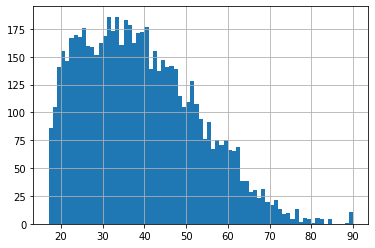

In [77]:
df['age'].hist(bins=73);

Young workers tend to be below 50k. 

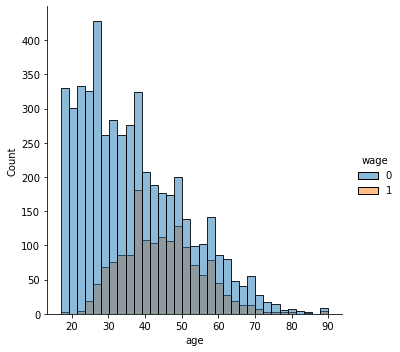

In [85]:
sns.displot(data=df, x='age', hue='wage');

The log of the weight feature is normaly distributed. 

<AxesSubplot:>

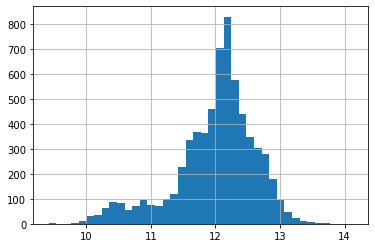

In [86]:
df['fnlwgt'].apply(np.log).hist(bins=40);

<AxesSubplot:>

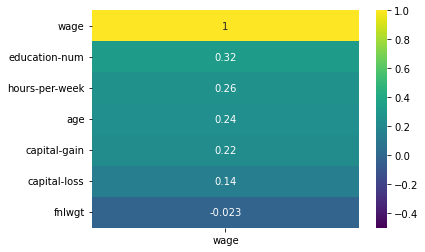

In [71]:
sns.heatmap(df.corr()[['wage']].sort_values(by='wage', ascending=False), annot=True , vmax=1, vmin=-0.5, cmap='viridis');

In [72]:
# features engineering
df['ed_num_x_hours']= df['education-num']*df['hours-per-week']

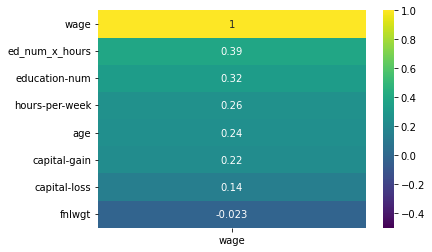

In [74]:
sns.heatmap(df.corr()[['wage']].sort_values(by='wage', ascending=False), annot=True , vmax=1, vmin=-0.5, cmap='viridis');

In [82]:
df['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [88]:
df.groupby('relationship').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,ed_num_x_hours
relationship,,,,,,,,
Husband,43.854900,188991.065467,10.350689,1762.567764,137.329250,44.113323,0.457504,460.811639
Not-in-family,38.200601,196264.819219,10.263664,737.723724,72.066066,40.603003,0.105105,420.405405
Other-relative,31.458763,208340.917526,8.587629,542.144330,48.989691,37.809278,0.030928,328.659794
Own-child,24.989205,195130.865554,9.546614,59.942100,36.177625,33.281649,0.014720,322.124632
Unmarried,40.686163,194775.432240,9.617689,390.770328,50.874465,38.697575,0.054208,374.495007
Wife,39.447205,181991.046584,10.295031,1944.878882,121.658385,36.683230,0.431677,378.577640


In [89]:
df['native-country'].value_counts(normalize=True)

 United-States                 0.891601
 Mexico                        0.023031
 ?                             0.018425
 Philippines                   0.006602
 El-Salvador                   0.004453
 Canada                        0.003992
 Germany                       0.003685
 Dominican-Republic            0.003071
 South                         0.002764
 Jamaica                       0.002764
 India                         0.002610
 China                         0.002610
 Puerto-Rico                   0.002610
 England                       0.002457
 Cuba                          0.002457
 Italy                         0.002303
 Poland                        0.002150
 Japan                         0.001842
 Haiti                         0.001689
 Guatemala                     0.001689
 Columbia                      0.001689
 Taiwan                        0.001535
 Iran                          0.001535
 Peru                          0.001382
 France                        0.001382


In [90]:
df.groupby('native-country').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,ed_num_x_hours
native-country,,,,,,,,
?,38.516667,179020.341667,10.491667,1318.616667,101.091667,42.766667,0.241667,452.925000
Cambodia,32.833333,183301.333333,8.500000,751.333333,267.000000,40.000000,0.333333,340.000000
Canada,42.576923,175179.653846,10.846154,199.153846,223.846154,38.769231,0.269231,422.192308
China,44.588235,201716.941176,12.000000,0.000000,436.529412,39.176471,0.235294,484.588235
Columbia,42.636364,197376.727273,9.636364,314.909091,0.000000,40.000000,0.090909,393.181818
Cuba,45.687500,233907.125000,9.562500,0.000000,92.812500,41.875000,0.250000,408.125000
Dominican-Republic,39.950000,188874.250000,8.250000,0.000000,0.000000,39.050000,0.000000,323.550000
Ecuador,34.750000,170105.250000,11.000000,0.000000,0.000000,40.500000,0.500000,468.500000
El-Salvador,36.793103,256250.482759,7.137931,1051.241379,0.000000,37.068966,0.137931,269.551724


In [92]:
df.groupby('workclass').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,ed_num_x_hours
workclass,,,,,,,,
?,40.187328,186990.958678,9.256198,316.148760,86.410468,31.851240,0.096419,293.741047
Federal-gov,42.544974,191584.502646,10.756614,533.767196,119.682540,40.814815,0.349206,441.158730
Local-gov,41.902613,192108.612827,11.123515,1119.755344,96.346793,40.232779,0.249406,451.570071
Never-worked,24.000000,191516.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
Private,36.745435,195434.066447,9.861166,979.996040,81.811221,40.252145,0.222882,401.649725
Self-emp-inc,46.515556,176532.235556,11.066667,3417.902222,168.422222,49.324444,0.591111,551.493333
Self-emp-not-inc,45.380952,181194.265873,10.311508,1636.718254,142.091270,44.224206,0.289683,456.656746
State-gov,38.900763,190705.145038,11.297710,624.038168,91.641221,39.958015,0.267176,458.725191
Without-pay,43.500000,109291.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000


In [93]:
df.groupby('occupation').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,ed_num_x_hours
occupation,,,,,,,,
?,40.098630,187015.753425,9.246575,314.416438,85.936986,31.676712,0.095890,292.131507
Adm-clerical,37.034166,191354.328515,10.136662,574.404731,86.892247,37.985545,0.148489,385.283837
Armed-Forces,31.000000,200724.000000,9.000000,0.000000,0.000000,29.000000,0.000000,261.000000
Craft-repair,39.096270,197082.231047,9.086643,550.370638,90.652226,42.405535,0.223827,387.317690
Exec-managerial,41.970692,187000.103165,11.431419,2157.069168,117.339977,45.500586,0.491208,522.366940
Farming-fishing,40.255435,179967.445652,8.538043,584.402174,83.402174,46.489130,0.092391,404.342391
Handlers-cleaners,32.298507,204925.593284,8.615672,102.149254,25.410448,37.888060,0.078358,326.197761
Machine-op-inspct,37.856764,198601.063660,8.376658,214.413793,46.594164,40.310345,0.106101,338.005305
Other-service,35.011696,189377.350877,8.682749,123.404971,39.690058,34.461988,0.049708,299.871345


In [94]:
df.groupby('marital-status').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,ed_num_x_hours
marital-status,,,,,,,,
Divorced,42.930958,193603.183742,10.096882,836.177060,59.247216,41.155902,0.104677,416.143653
Married-AF-spouse,30.428571,325648.571429,10.571429,0.000000,0.000000,35.714286,0.428571,368.428571
Married-civ-spouse,43.221289,188685.560107,10.315984,1778.751175,134.278039,43.252854,0.449966,450.179315
Married-spouse-absent,39.604938,187307.074074,8.827160,1320.925926,93.481481,37.641975,0.049383,342.567901
Never-married,27.962998,197749.082436,9.927869,274.832319,50.955972,37.030445,0.046838,373.567681
Separated,39.809524,205757.728571,9.166667,207.580952,85.904762,38.828571,0.066667,358.366667
Widowed,59.784314,177473.960784,9.205882,554.965686,60.848039,33.029412,0.063725,306.671569


In [95]:
df.groupby('capital-loss').mean()

,age,fnlwgt,education-num,capital-gain,hours-per-week,wage,ed_num_x_hours
capital-loss,,,,,,,
0,38.383298,192920.02859,10.023744,1114.290906,40.26377,0.228396,408.365369
155,28.000000,140845.00000,6.000000,0.000000,40.00000,0.000000,240.000000
213,37.000000,188818.50000,13.000000,0.000000,40.00000,0.000000,520.000000
323,49.000000,78859.00000,14.000000,0.000000,20.00000,0.000000,280.000000
419,27.000000,501172.00000,10.000000,0.000000,20.00000,0.000000,200.000000
...,...,...,...,...,...,...,...
2603,61.000000,135285.00000,9.000000,0.000000,32.00000,0.000000,288.000000
2754,61.000000,29059.00000,9.000000,0.000000,25.00000,0.000000,225.000000
2824,38.000000,164526.00000,15.000000,0.000000,45.00000,1.000000,675.000000


# Pre-Processing
